In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import scipy.stats as stats

<h1 style="color: red;">HYPOTHESIS TESTING</h1>


Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on a sample of data. The process begins with formulating two competing hypotheses: the null hypothesis (H₀), which represents the default or status quo, and the alternative hypothesis (H₁), which suggests that there is an effect or a difference. For example, in a clinical trial, the null hypothesis might state that a new drug has no effect on patients, while the alternative hypothesis would claim that the drug does have an effect. Once the hypotheses are established, a significance level (often denoted as α, typically set at 0.05) is chosen, indicating the probability of rejecting the null hypothesis when it is actually true.

After setting up the hypotheses and significance level, data is collected and analyzed, often using statistical tests such as t-tests or chi-square tests, depending on the nature of the data and the hypotheses. The results yield a test statistic, which is then compared against a critical value derived from the chosen significance level and the distribution of the test statistic. If the test statistic falls into the critical region (or if the p-value is less than α), the null hypothesis is rejected in favor of the alternative hypothesis. Conversely, if the evidence is insufficient, the null hypothesis is not rejected, although this does not prove it true. Overall, hypothesis testing is a fundamental aspect of statistical analysis, helping researchers make informed decisions based on empirical data.

<h2 style="color: brown;">T-TEST</h2>

A t-test is a statistical method used to determine whether there is a significant difference between the means of two groups or between a sample mean and a known value, particularly when sample sizes are small and the population standard deviation is unknown. It relies on the t-distribution, which accounts for the variability introduced by estimating the population standard deviation from the sample data. There are different types of t-tests, including independent samples t-tests, paired samples t-tests, and one-sample t-tests, each suited for different scenarios. The test involves calculating a t-statistic that reflects the difference between group means relative to the variability within the data. This statistic is then compared to a critical value from the t-distribution, and if the t-statistic exceeds this value, the null hypothesis is rejected, indicating a statistically significant difference. The t-test is widely utilized in various fields to assess hypotheses based on empirical data.

<h3 style="color: brown;">ONE SAMPLED T-TEST</h3>

A one-sample t-test assesses whether the mean of a single sample significantly differs from a known population mean. It calculates a t-statistic based on the sample mean, standard deviation, and size, comparing it to a critical value from the t-distribution to determine statistical significance.

In [10]:
np.random.seed(6)
pop_ages1=np.random.poisson(lam=35,size=150000)
pop_ages2=np.random.poisson(lam=10,size=100000)
pop_ages=np.concatenate((pop_ages1,pop_ages2))

kabete_ages1=np.random.poisson(lam=30,size=30)
kabete_ages2=np.random.poisson(lam=10,size=20)
kabete_ages=np.concatenate((kabete_ages1,kabete_ages2))

print('pop_ages_mean:')
print(pop_ages.mean())
print('kabete_ages_mean:')
print(kabete_ages.mean())


pop_ages_mean:
25.000112
kabete_ages_mean:
21.26


In [11]:
stats.ttest_1samp(a=kabete_ages,popmean=pop_ages.mean())

TtestResult(statistic=np.float64(-2.5742714883655), pvalue=np.float64(0.013118685425061784), df=np.int64(49))

The output you provided is from a t-test result, indicating the following key statistics:

1. **Statistic**: The t-statistic is approximately \(-2.57\). This value measures the size of the difference relative to the variation in the sample data. A negative value suggests that the sample mean is lower than the hypothesized population mean.

2. **P-value**: The p-value is approximately \(0.0131\). This indicates the probability of observing a t-statistic as extreme as \(-2.57\) (or more extreme) under the null hypothesis. A p-value less than the common significance level of \(0.05\) suggests that the result is statistically significant, leading to rejection of the null hypothesis.

3. **Degrees of Freedom (df)**: The degrees of freedom is \(49\), calculated as \(n - 1\) where \(n\) is the sample size. In this case, it indicates the number of independent values that can vary in the calculation.

Overall, these results suggest that there is a statistically significant difference between the sample mean and the population mean being tested against, assuming the null hypothesis states there is no difference.

critical_value_upper:
2.0095752371292397
critical_value_lower:
-2.0095752371292397


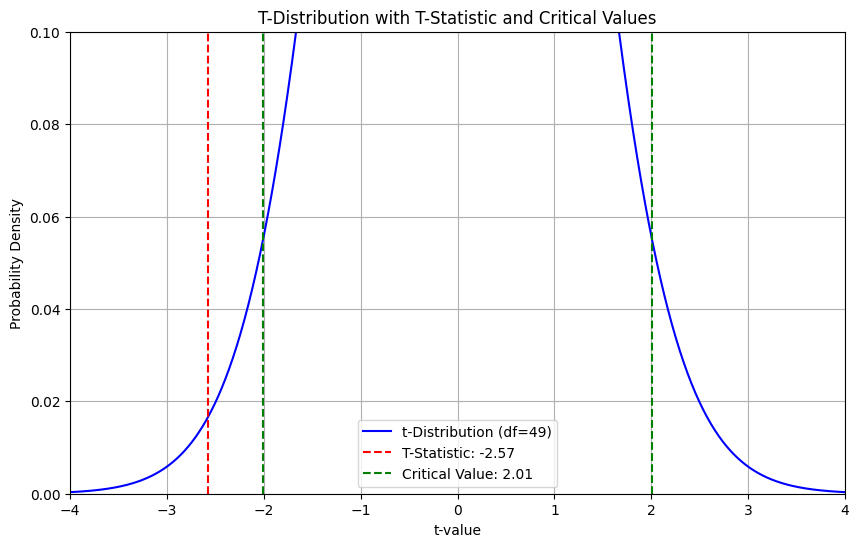

In [15]:
t_statistic = -2.5743
p_value = 0.0131
df = 49

# Define the range for the normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-Distribution (df=49)', color='blue')

# Highlight the t-statistic
plt.axvline(t_statistic, color='red', linestyle='--', label=f'T-Statistic: {t_statistic:.2f}')

# Calculate critical values for a two-tailed test
alpha = 0.05
critical_value_upper = stats.t.ppf(0.975, df)
critical_value_lower = stats.t.ppf(0.025, df)
print('critical_value_upper:')
print(critical_value_upper)
print('critical_value_lower:')
print(critical_value_lower)
# Highlight the critical regions
plt.axvline(critical_value_upper, color='green', linestyle='--', label=f'Critical Value: {critical_value_upper:.2f}')
plt.axvline(critical_value_lower, color='green', linestyle='--')

# Customize the plot
plt.title('T-Distribution with T-Statistic and Critical Values')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.xlim(-4, 4)
plt.ylim(0, 0.1)

# Show the plot
plt.show()

confidence interval

In [16]:
sigma=kabete_ages.std()/math.sqrt(50)
confidence_interval=stats.t.interval(confidence=0.95,df=49,loc=kabete_ages.mean(),scale=sigma)
print('confidence_interval:')
print(confidence_interval)

confidence_interval:
(np.float64(18.369669076925078), np.float64(24.150330923074925))


<h3 style="color: brown;">TWO SAMPLED T-TEST</h3>

Purpose: Compares the means of two independent groups to determine if there is a statistically significant difference between them.

Assumptions: The samples are independent, and each sample should come from a normally distributed population. The two groups can have different variances (though you can perform a version that assumes equal variances).

Example: Comparing test scores between two different classes of students.

In [21]:
np.random.seed(12)
kikuyu_ages1=np.random.poisson(lam=33,size=30)
kikuyu_ages2=np.random.poisson(lam=13,size=20)
kikuyu_ages=np.concatenate((kikuyu_ages1,kikuyu_ages2))
print('kikuyu_ages.mean:')
print(kikuyu_ages.mean())


kikuyu_ages.mean:
24.8


In [22]:
stats.ttest_ind(a=kabete_ages,b=kikuyu_ages,equal_var=False)

TtestResult(statistic=np.float64(-1.7083870793286842), pvalue=np.float64(0.09073104343957748), df=np.float64(97.9724575497005))

The output you provided indicates the results of a t-test with the following key statistics:

1. **Statistic**: The t-statistic is approximately \(-1.71\). This value measures the size of the difference between the group means relative to the variability in the sample data. A negative value indicates that the mean of the first group (or sample) is lower than that of the second group (or the hypothesized value).

2. **P-value**: The p-value is approximately \(0.0907\). This value represents the probability of observing a t-statistic as extreme as \(-1.71\) (or more extreme) under the null hypothesis. If you set a significance level (commonly \(\alpha = 0.05\)), this p-value suggests that the result is not statistically significant, as it is greater than \(0.05\).

3. **Degrees of Freedom (df)**: The degrees of freedom is approximately \(97.97\). This value is typically calculated based on the sample sizes and variances of the two groups being compared. In this case, it suggests a more complex calculation, possibly due to unequal variances (using Welch's t-test).

Conclusion:
Given this information, you would reject the null hypothesis, concluding that there is a statistically significant difference between the sample mean and the hypothesized population mean.

<h3 style="color: brown;">PAIRED T-TEST</h3>

A paired t-test is a statistical method used to compare the means of two related groups, typically when the same subjects are measured under two different conditions or at two different times. It assesses whether the mean difference between paired observations is significantly different from zero, making it useful for evaluating the effects of interventions or treatments. The test assumes that the differences between pairs are normally distributed and that the observations are dependent. To conduct the test, the differences between each pair are calculated, and a t-statistic is computed using the mean and standard deviation of these differences. If the calculated t-statistic exceeds the critical value from the t-distribution, the null hypothesis is rejected, indicating a significant difference in means.

For instance, a hospotal may want to test the effectiveness of a weight loss drug by checking the weights of patients before treatment and after treatment

In [25]:
np.random.seed(11)
before=np.random.normal(scale=30, loc=250, size=100)
after=before+np.random.normal(scale=5, loc=-1.25,size=100)

weight_df=pd.DataFrame({'weight_before':before,
                        'weight_after':after,
                        'weight_change':after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [26]:
stats.ttest_rel(a=before,b=after)

TtestResult(statistic=np.float64(2.5720175998568284), pvalue=np.float64(0.011596444318439859), df=np.int64(99))

Given the results of your paired t-test, with a p-value of approximately 
0.0116
0.0116, you would reject the null hypothesis.

Since the p-value is less than the common significance level of 
0.05
0.05, this indicates that there is statistically significant evidence to suggest that the mean weight change (from "before" to "after") is different from zero. In this context, it supports the conclusion that the intervention or treatment has led to a significant decrease in weight.

<h3 style="color: brown;">TYPE I AND TYPE II ERRORS</h3>

Type I and Type II errors are two types of errors that can occur in hypothesis testing, reflecting different mistakes in decision-making regarding the null hypothesis.

### Type I Error:
- **Definition**: A Type I error occurs when the null hypothesis is incorrectly rejected when it is actually true. In other words, it is a false positive.
- **Implication**: This error leads to the conclusion that there is an effect or difference when none exists. The probability of making a Type I error is denoted by the significance level (\(\alpha\)), commonly set at \(0.05\).
- **Example**: In a clinical trial, concluding that a new drug is effective when it actually has no effect.

### Type II Error:
- **Definition**: A Type II error occurs when the null hypothesis is not rejected when it is false. This means failing to detect an effect or difference that actually exists, leading to a false negative.
- **Implication**: This error results in missing an opportunity to identify a significant effect. The probability of making a Type II error is denoted by \(\beta\).
- **Example**: In a clinical trial, concluding that a new drug is ineffective when it actually has a positive effect.

### Summary:
In hypothesis testing, Type I errors are about mistakenly finding evidence for an effect, while Type II errors are about failing to find evidence when an effect truly exists. Balancing these errors is crucial in designing studies and interpreting results.